<a href="https://colab.research.google.com/github/cris1dev/Challenge-Telecom-X-analisis-de-evasion-de-clientes/blob/main/TelecomX_LATAM_Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

Se procede a extraer los datos utilizando utilizando las librerías "request" (para obtener los datos desde un servidor) y "pandas" (para obtener data frame del archivo .json)

In [89]:
import requests
import pandas as pd

In [90]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [91]:
#Se aplanan los datos anidados (diccionarios dentro de diccionarios) para visualizarlos en un df y posteriomente analizar la composición del df

df = pd.json_normalize(data)
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


🔍 **Análisis de la Estructura de los Datos**
Los datos están organizados en un formato jerárquico (diccionario dentro de diccionario), conteniendo la siguiente información:

1. **Identificación del Cliente** - `'customerID'`: Identificador único del cliente.
* `'Churn'`: Indica si el cliente canceló el servicio (`Yes` o `No`).


2. **Información del Cliente** (`'customer'`)
* `'gender'`: Género del cliente (`Male` o `Female`).
* `'SeniorCitizen'`: Indica si el cliente es una persona mayor (0 = No, 1 = Sí).
* `'Partner'`: Si el cliente tiene pareja.
* `'Dependents'`: Si el cliente tiene dependientes.
* `'tenure'`: Tiempo de permanencia como cliente (en meses).


3. **Servicios de Telefonía** (`'phone'`)
* `'PhoneService'`: Indica si el cliente posee servicio de teléfono (`Yes` o `No`).
* `'MultipleLines'`: Si posee múltiples líneas telefónicas.


4. **Servicios de Internet** (`'internet'`)
* Tipo de servicio de internet contratado (`DSL`, `Fiber optic`, `No`).
* Servicios adicionales (`OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`).


5. **Información de la Cuenta** (`'account'`)
* `'Contract'`: Tipo de contrato (`Month-to-month`, `One year`, `Two year`).
* `'PaperlessBilling'`: Si el cliente recibe facturas electrónicas.
* `'PaymentMethod'`: Método de pago (`Bank transfer`, `Credit card`, `Electronic check`, `Mailed check`).
* `'Charges'`:
* `'Monthly'`: Valor mensual cobrado.
* `'Total'`: Valor total pagado por el cliente.

#🔧 Transformación

In [92]:
#Se verifican las columnas de datos, sus cantidades, cantidad de datos nulos y los tipos de datos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

**VERIFICACIONES**

1. Verificando valores unicos

In [93]:
#Lo relevante es encontrar valores únicos de cada columna, aportarán relevancia si son menores a 50 valores únicos

for col in df.columns:
  print(f'{col}: {df[col].nunique()}')
  if df[col].nunique() < 50:
    print(df[col].unique())
    print('-' * 50)

customerID: 7267
Churn: 3
['No' 'Yes' '']
--------------------------------------------------
customer.gender: 2
['Female' 'Male']
--------------------------------------------------
customer.SeniorCitizen: 2
[0 1]
--------------------------------------------------
customer.Partner: 2
['Yes' 'No']
--------------------------------------------------
customer.Dependents: 2
['Yes' 'No']
--------------------------------------------------
customer.tenure: 73
phone.PhoneService: 2
['Yes' 'No']
--------------------------------------------------
phone.MultipleLines: 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
internet.InternetService: 3
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
internet.OnlineSecurity: 3
['No' 'Yes' 'No internet service']
--------------------------------------------------
internet.OnlineBackup: 3
['Yes' 'No' 'No internet service']
--------------------------------------------------
internet.DeviceProtecti

2. Valores Duplicados

In [94]:
print("Numero de duplicados", df.duplicated().sum())

Numero de duplicados 0



3. Valores nulos

In [95]:
print("Numero de Nulos \n", df.isnull().sum())

Numero de Nulos 
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


4. Valores vacíos o en blanco

In [96]:
#Identificar y sumar la cantidad de valores vacios por categoría

df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


**TRANSFORMACIONES**

1. Cambiando la columna "account.Charges.Total" a Float

In [97]:
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
print(df['account.Charges.Total'].dtype)


float64


2. Eliminación de valores vacios en la columna Churn

In [98]:
df= df[df['Churn'].str.strip() != '']
print("Número de filas después de eliminar las vacías en 'Churn':", len(df))

Número de filas después de eliminar las vacías en 'Churn': 7043


3. Verificación de vacíos o en blanco

In [99]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [100]:
print("Numero de Nulos \n", df.isnull().sum())

Numero de Nulos 
 customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64


In [101]:
df = df.dropna(subset=['account.Charges.Total'])

In [102]:
print("Numero de Nulos \n", df.isnull().sum())

Numero de Nulos 
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


## 📖 Estandarización español

In [103]:
# Diccionario con los nuevos nombres de las columnas.

columnas = {
    'customerID': 'id',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'tiene +60',
    'customer.Partner': 'posee_pareja',
    'customer.Dependents': 'posee_dependientes',
    'customer.tenure': 'tiempo_contrato',
    'phone.PhoneService': 'servicio_telefono',
    'phone.MultipleLines': 'multiples_lineas',
    'internet.InternetService': 'tipo_internet',
    'internet.OnlineSecurity': 'seguridad_online',
    'internet.OnlineBackup': 'backup_online',
    'internet.DeviceProtection': 'proteccion_dispositivo',
    'internet.TechSupport': 'soporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_peliculas',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'factura_digital',
    'account.PaymentMethod': 'metodo_pago',
    'account.Charges.Monthly': 'valor_mensal',
    'account.Charges.Total': 'total_cobrado'
}
df = df.rename(columns= columnas)
df

,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,backup_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensal,total_cobrado
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [104]:
#Traducción de valores a español para facilitar su comprensión

df['Churn'] = df['Churn'].replace({'No': 'No', 'Yes': 'Sí'})
df['genero'] = df['genero'].replace({'Female': 'Femenino', 'Male': 'Masculino'})
df['posee_pareja'] = df['posee_pareja'].replace({'Yes': 'Sí', 'No': 'No'})
df['posee_dependientes'] = df['posee_dependientes'].replace({'Yes': 'Sí', 'No': 'No'})
df['servicio_telefono'] = df['servicio_telefono'].replace({'Yes': 'Sí', 'No': 'No'})
df['multiples_lineas'] = df['multiples_lineas'].replace({'No': 'No', 'Yes': 'Sí', 'No phone service': 'Sin servicio de teléfono'})
df['tipo_internet'] = df['tipo_internet'].replace({'No': 'No'})
df['tipo_contrato'] = df['tipo_contrato'].replace({'One year': 'Anual', 'Month-to-month': 'Mensual', 'Two year': 'Bienal'})
df.head()


,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,backup_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensal,total_cobrado
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,...,Yes,No,Yes,Yes,No,Anual,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,...,No,No,No,No,Yes,Mensual,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fiber optic,...,No,Yes,No,No,No,Mensual,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Mensual,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fiber optic,...,No,No,Yes,Yes,No,Mensual,Yes,Mailed check,83.9,267.40


In [105]:
columnas_a_traducir = ['seguridad_online', 'backup_online', 'proteccion_dispositivo', 'soporte_tecnico', 'streaming_tv', 'streaming_peliculas']
mapeo = {'No': 'No', 'Yes': 'Sí', 'No internet service': 'Sin servicio de internet'}

for col in columnas_a_traducir:
    df[col] = df[col].replace(mapeo)

df.head()

,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,backup_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensal,total_cobrado
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,...,Sí,No,Sí,Sí,No,Anual,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,...,No,No,No,No,Sí,Mensual,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fiber optic,...,No,Sí,No,No,No,Mensual,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fiber optic,...,Sí,Sí,No,Sí,Sí,Mensual,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fiber optic,...,No,No,Sí,Sí,No,Mensual,Yes,Mailed check,83.9,267.40


In [106]:
df['metodo_pago'] = df['metodo_pago'].replace({
    'Mailed check': 'Cheque enviado por correo',
    'Electronic check': 'Cheque electrónico',
    'Credit card (automatic)': 'Tarjeta de crédito (automático)',
    'Bank transfer (automatic)': 'Transferencia bancaria (automática)'
})
df.head()

,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,backup_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensal,total_cobrado
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,...,Sí,No,Sí,Sí,No,Anual,Yes,Cheque enviado por correo,65.6,593.30
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,...,No,No,No,No,Sí,Mensual,No,Cheque enviado por correo,59.9,542.40
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fiber optic,...,No,Sí,No,No,No,Mensual,Yes,Cheque electrónico,73.9,280.85
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fiber optic,...,Sí,Sí,No,Sí,Sí,Mensual,Yes,Cheque electrónico,98.0,1237.85
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fiber optic,...,No,No,Sí,Sí,No,Mensual,Yes,Cheque enviado por correo,83.9,267.40


In [107]:
df

,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,backup_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensal,total_cobrado
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,...,Sí,No,Sí,Sí,No,Anual,Yes,Cheque enviado por correo,65.60,593.30
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,...,No,No,No,No,Sí,Mensual,No,Cheque enviado por correo,59.90,542.40
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fiber optic,...,No,Sí,No,No,No,Mensual,Yes,Cheque electrónico,73.90,280.85
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fiber optic,...,Sí,Sí,No,Sí,Sí,Mensual,Yes,Cheque electrónico,98.00,1237.85
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fiber optic,...,No,No,Sí,Sí,No,Mensual,Yes,Cheque enviado por correo,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Femenino,0,No,No,13,Sí,No,DSL,...,No,No,Sí,No,No,Anual,No,Cheque enviado por correo,55.15,742.90
7263,9992-RRAMN,Sí,Masculino,0,Sí,No,22,Sí,Sí,Fiber optic,...,No,No,No,No,Sí,Mensual,Yes,Cheque electrónico,85.10,1873.70
7264,9992-UJOEL,No,Masculino,0,No,No,2,Sí,No,DSL,...,Sí,No,No,No,No,Mensual,Yes,Cheque enviado por correo,50.30,92.75
7265,9993-LHIEB,No,Masculino,0,Sí,Sí,67,Sí,No,DSL,...,No,Sí,Sí,No,Sí,Bienal,No,Cheque enviado por correo,67.85,4627.65


#📊 Carga y análisis

1.Analisis Descriptiva

In [108]:
df.describe()

,tiene +60,tiempo_contrato,valor_mensal,total_cobrado
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


2. Distribución de la Evasión

/tmp/ipython-input-2108678474.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




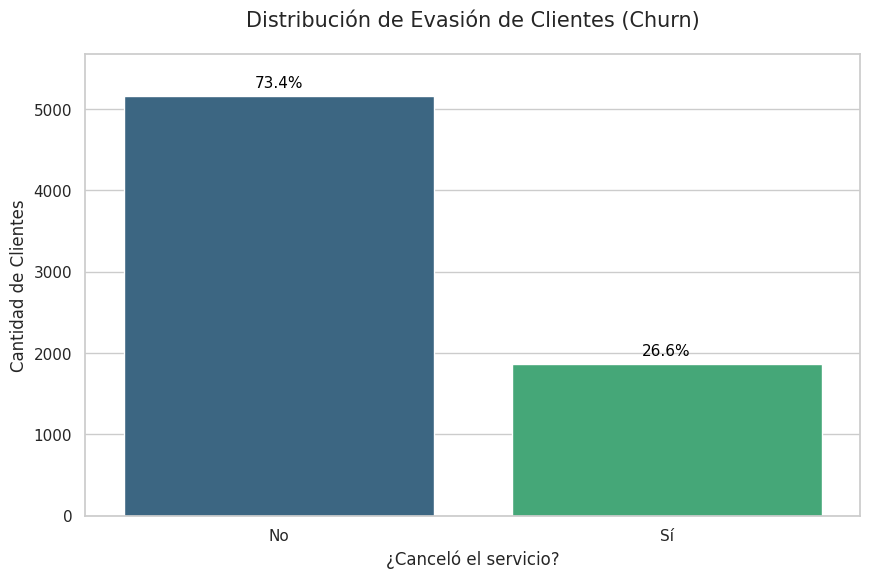

In [109]:
#Representación Gráfica de Churn (quienes cancelaron su plan y quienes no)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Cálculo de Churn
churn_counts = df['Churn'].value_counts()
total = len(df)

# Usamos un mapa de colores (palette)
ax = sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='viridis')

plt.title('Distribución de Evasión de Clientes (Churn)', fontsize=15, pad=20)
plt.xlabel('¿Canceló el servicio?', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)

for i, p in enumerate(ax.patches):
    percentage = (p.get_height() / total) * 100
    # Colocamos el texto justo encima de la barra
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=11, color='black',
                xytext=(0, 9),
                textcoords='offset points')

# Ajustar límites para que el texto no se corte
plt.ylim(0, churn_counts.max() * 1.1)
plt.show()

2.1 Conteo por tiempo de contrato

In [110]:
import plotly.express as px

fig = px.histogram(
    df,
    x='tiempo_contrato',
    color='Churn',
    barmode='group',
    text_auto='.0f', # Muestra números enteros limpios sobre las barras
    color_discrete_map={'Yes': '#EF553B', 'No': '#636EFA'}, # Rojo para Churn, Azul para leales
    category_orders={'tiempo_contrato': sorted(df['tiempo_contrato'].unique())}, # Asegura orden cronológico
    title='<b>Fuga de clientes con el paso del tiempo</b>',
    labels={'tiempo_contrato': 'Meses de Contrato', 'count': 'Número de Clientes', 'Churn': '¿Se fue?'}
)

fig.update_layout(
    title_font_size=20,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    legend_title_text='Estado de Churn',
    bargap=0.2, # Espacio entre grupos de barras
    plot_bgcolor='white' # Fondo limpio
)

fig.show()

2.2 Conteo tipo de contrato

In [111]:
import plotly.express as px

# 1. Definir una paleta de colores semántica (Rojo para alerta/Churn)
colores = {'Sí': '#e74c3c', 'No': '#2ecc71'}

# 2. Crear el gráfico optimizado
fig = px.histogram(
    df,
    x='tipo_contrato',
    color='Churn',
    barmode='group',
    text_auto='.0f', # Muestra números enteros limpios
    color_discrete_map=colores,
    title='<b>Análisis de Abandono por Tipo de Contrato</b>',
    labels={
        'tipo_contrato': 'Tipo de Contrato',
        'count': 'Número de Clientes',
        'Churn': 'Estado del Cliente'
    },
    category_orders={'tipo_contrato': ['Mensual', 'Anual', 'Bienal']} # Ordena por relevancia
)

# 3. Pulir estética del Layout
fig.update_layout(
    title_font_size=22,
    plot_bgcolor='white',
    bargap=0.2,
    legend_title_text='¿El cliente se fue?',
    xaxis_title_font=dict(size=14, weight='bold'),
    yaxis_title_font=dict(size=14, weight='bold')
)

# 4. Añadir una línea de referencia para mejorar la lectura
fig.update_yaxes(showgrid=True, gridcolor='LightGray')

fig.show()

2.3 Conteo por tipo de internet

In [112]:
#Decantación por la estelización

import plotly.express as px

# 1. Definir paleta de colores
colores = {'Sí': '#E74C3C', 'No': '#2ECC71'}

# 2. Crear el gráfico optimizado
fig = px.histogram(
    df,
    x='tipo_internet',
    color='Churn',
    barmode='group',
    text_auto='.0f', # Muestra números enteros limpios
    color_discrete_map=colores,
    title='<b>Análisis de Abandono por Tipo de Internet</b>',
    labels={'tipo_internet': 'Tecnología de Internet', 'count': 'Total de Clientes', 'Churn': 'Estado'},
    category_orders={'tipo_internet': df['tipo_internet'].value_counts().index} # Ordena de mayor a menor volumen
)

# 3. Pulir estética del Layout
fig.update_layout(
    title_font_size=22,
    plot_bgcolor='white',
    bargap=0.2,
    legend_title_text='¿Se fue el cliente?',
    xaxis_title_font=dict(size=14, weight='bold'),
    yaxis_title_font=dict(size=14, weight='bold')
)

# 4. Añadir una línea de referencia para mejorar la lectura
fig.update_yaxes(showgrid=True, gridcolor='LightGray')

fig.show()

2.4 Conteo por método de pago

In [113]:
import plotly.express as px

# 1. Definir una paleta de colores semántica (Rojo para alerta/Churn)
colores = {'Sí': '#e74c3c', 'No': '#2ecc71'}

# 2. Crear el gráfico optimizado
fig = px.histogram(
    df,
    x='metodo_pago',
    color='Churn',
    barmode='group',
    text_auto='.0f', # Muestra números enteros limpios
    color_discrete_map=colores,
    title='<b>Análisis de Abandono por Método de Pago</b>',
    labels={
        'metodo_pago': 'Método de Pago',
        'count': 'Número de Clientes',
        'Churn': 'Estado del Cliente'
    },
    category_orders={'metodo_pago': df['metodo_pago'].value_counts().index} # Ordena por frecuencia
)

# 3. Pulir estética del Layout
fig.update_layout(
    title_font_size=22,
    plot_bgcolor='white',
    bargap=0.2,
    legend_title_text='¿El cliente se fue?',
    xaxis_title_font=dict(size=14, weight='bold'),
    yaxis_title_font=dict(size=14, weight='bold')
)

# 4. Añadir una línea de referencia para mejorar la lectura
fig.update_yaxes(showgrid=True, gridcolor='LightGray')

fig.show()

#📄Informe final

🔹 Introducción:
<br>

En el contexto de la alta tasa de cancelación de servicios por parte de los clientes de la empresa Telecom X, esta última busca comprender los factores que explican tales pérdidas.


Para ello se ha formado el proyecto “Churn de clientes” el cual se encargará de recopilar, procesar y analizar los datos, utilizando el lenguaje Python y sus principales bibliotecas para extraer información valiosa. Posterior al análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollo de estrategias para evitar la cancelación de los clientes.

<br>

🔹 Limpieza y Tratamiento de Datos (paso a paso del proceso productivo)

En primera instancia, se procedió a extraer los datos cargados en plataforma GIT (archivo json), lo cual se logró utilizando la plataforma de Google Colab, en el lenguaje Python, apoyándose de las librerías Request y Pandas.

Una vez generado el data frame, se aplanaron los datos con la función “normalize” para poder visualizar diccionarios dentro de diccionarios, obteniendo la siguiente estructura de datos:

1.	Identificación del Cliente - 'customerID': Identificador único del cliente.

  * 'Churn': Indica si el cliente canceló el servicio (Yes o No).


2.	Información del Cliente ('customer')
  * 'gender': Género del cliente (Male o Female).
  * 'SeniorCitizen': Indica si el cliente es una persona mayor (0 = No, 1 = Sí).
  * 'Partner': Si el cliente tiene pareja.
  * 'Dependents': Si el cliente tiene dependientes.
  * 'tenure': Tiempo de permanencia como cliente (en meses).
3.	Servicios de Telefonía ('phone')
  * 'PhoneService': Indica si el cliente posee servicio de teléfono (Yes o No).
  * 'MultipleLines': Si posee múltiples líneas telefónicas.
4.	Servicios de Internet ('internet')
  * Tipo de servicio de internet contratado (DSL, Fiber optic, No).
  * Servicios adicionales (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies).
5.	Información de la Cuenta ('account')
  * Contract': Tipo de contrato (Month-to-month, One year, Two year).
  * 'PaperlessBilling': Si el cliente recibe facturas electrónicas.
  * 'PaymentMethod': Método de pago (Bank transfer, Credit card, Electronic check, Mailed check).
  * 'Charges':
  * 'Monthly': Valor mensual cobrado.
  * 'Total': Valor total pagado por el cliente.

Fue necesario limpiar la base de datos para eliminar todos aquellos valores vacíos o nulos, y verificar que la información a analizar no estuviera contaminada con valores duplicados, nulos o vacíos que no aportaran valor, finalmente se tradujeron diccionarios y valores.

<br>

🔹 Análisis Exploratorio de Datos

La información obtenida del procesamiento de datos se sintetizó y representó gráficamente de la siguiente manera con la finalidad de encontrar patrones:

1.	El porcentaje de cancelación de servicios por cliente corresponde al 26.6%:

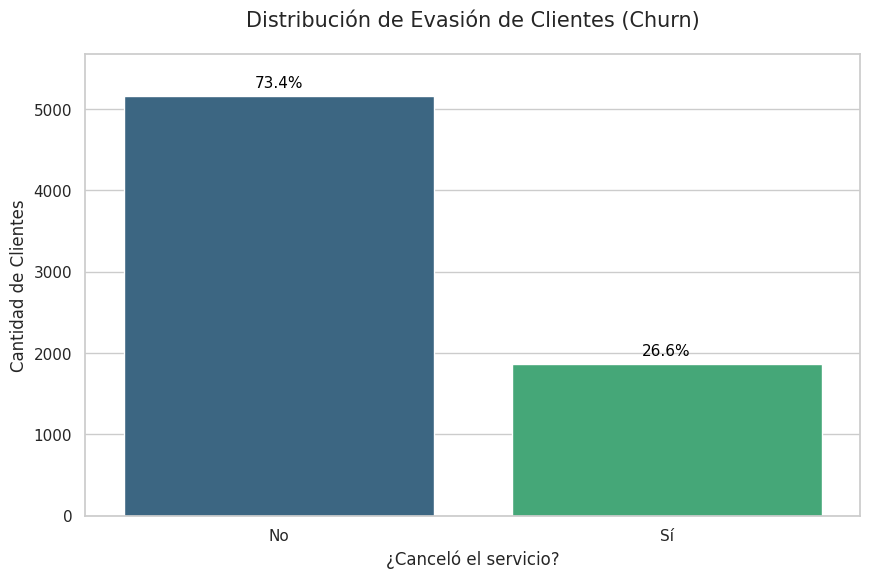

2.	El conteo de cancelaciones por tiempo de contrato de servicios va desde un mínimo de un mes a un máximo de 72 meses, donde se aprecia que la mayor pérdida de clientes se generó durante los primeros meses:
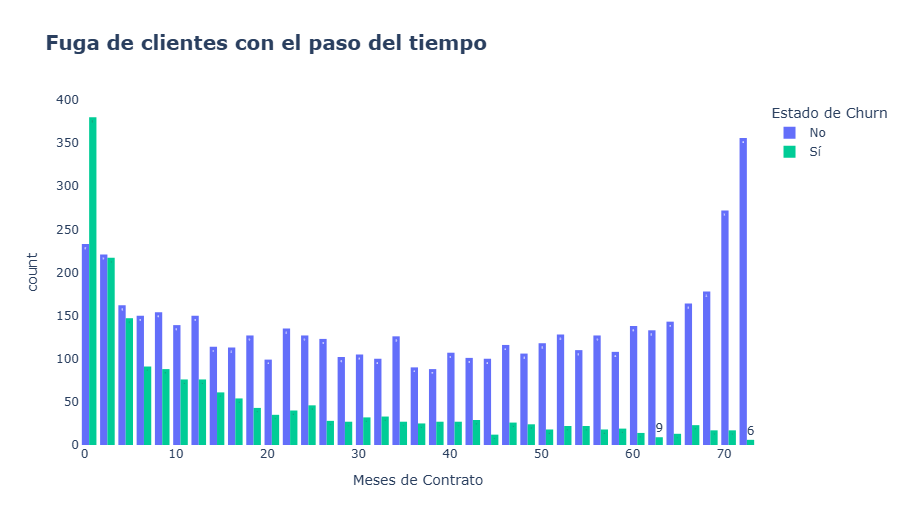

3.	El análisis de cancelación por tipo de contrato evidencia que hay mayor pérdida en los contratos de tipo mensual y una mayor fidelidad en los contratos de tipo bienal.
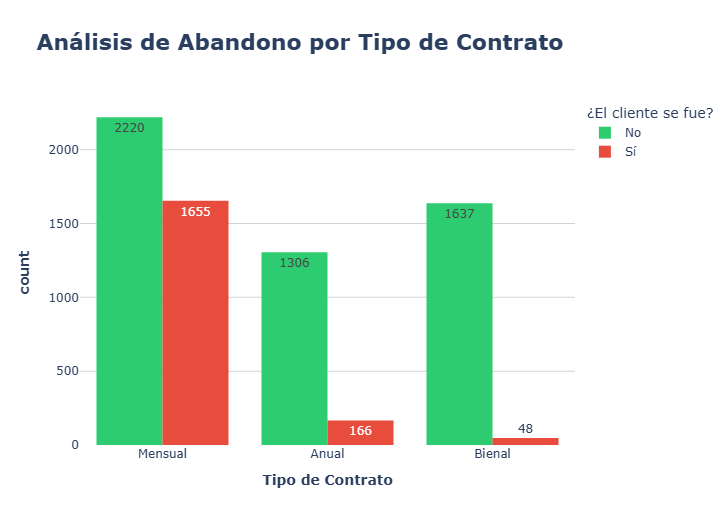

4.	El conteo de cancelación por tipo de internet contratado evidencia una mayor pérdida de clientes en el servicio de fibra óptica (total 1297) y una menor pérdida los servicios que no son de entrega de conexión (113).
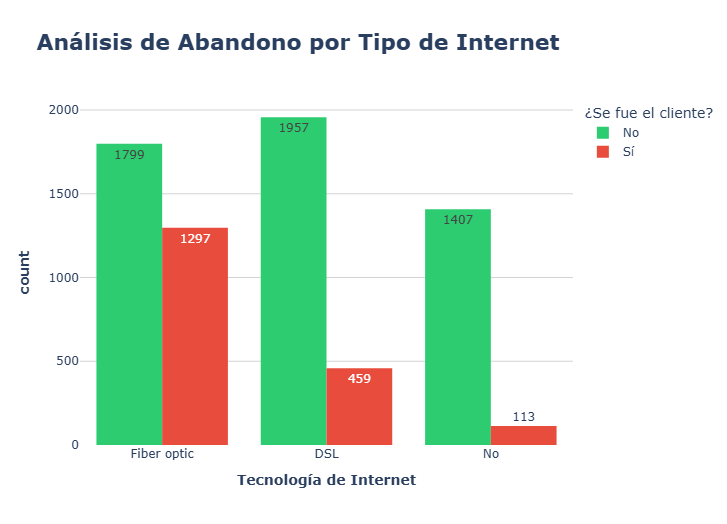

5.	El conteo de cancelación por método de pago evidencia una mayor pérdida de clientes en aquellos que pagan utilizando cheque electrónico:


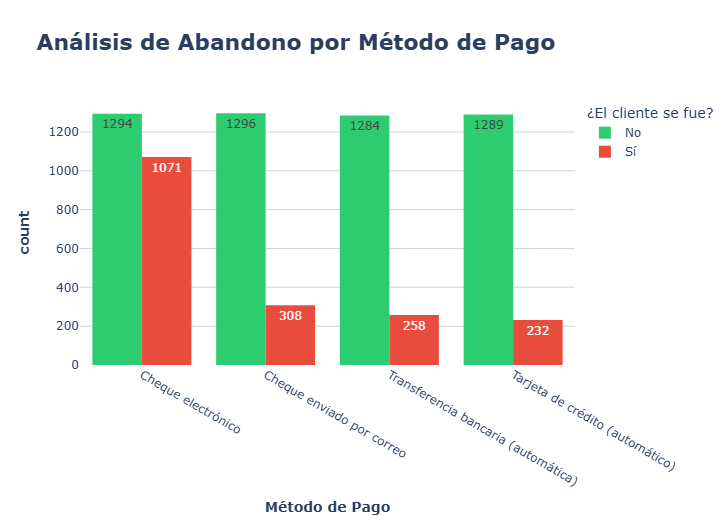


🔹 Conclusiones e Insights
<br>

De acuerdo con el análisis presentado, se puede concluir que los clientes que presentan mayor fuga comparten las siguientes condiciones; se fugan durante los primeros meses de uso de servicio, prefieren contratos mensuales, son consumidores de servicio de fibra óptica, usa método de pago de cheque electrónico.

Lo anterior se puede explicar por dos motivos, uno por parte del cliente y otro por parte del oferente:
•	El cliente solo está probando el servicio para ver si se convence, de modo que no se compromete a planes a largo plazo, una vez comprobada la experiencia, resultando negativa, da de baja los servicios contratados.
•	Por parte del oferente, el primer mes de experiencia resulta insatisfactorio para los clientes en general, lo que genera pérdida de usuarios en el corto plazo, lo que resulta más notorio durante los 5 primeros meses del servicio.

<br>

🔹 Recomendaciones:
<br>

Se recomienda analizar el servicio generado durante los 5 primeros meses, considerar encuestas de satisfacción, revisión temprana de reclamos y solicitudes de clientes, así como generar sistemas de compensación, aumentando la probabilidad de satisfacción y fidelidades de clientes en el largo plazo, tras lo cual se debe continuar con monitorización de calidad del servicio.
